imp 1888. Minimum Number of Flips to Make the Binary String Alternating    
https://leetcode.com/problems/minimum-number-of-flips-to-make-the-binary-string-alternating/description/

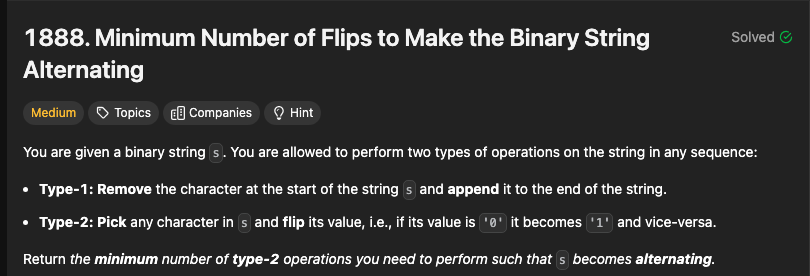

Observations
Given a size, there will be 2 unique strings alternating corresponding to it

In [ ]:
//brute force
class Solution {
public:
    int comp(string &s, string &alt,int n){
        int ans=0;
        for(int i=0;i<n;i++){
            if(s[i]!=alt[i]) ans++;
        }
        return ans;
    }

    void leftRotateBy1(string &s){
        int n=s.size();
        int tmp=s[0];
        for(int i=1;i<n;i++) s[i-1]=s[i];
        s[n-1]=tmp;
    }

    void generateTargetString(string &alt1, string &alt2, int n){
        for(int i = 0; i < n; i++) {
            alt1 += i % 2 ? '0' : '1';
            alt2 += i % 2 ? '1' : '0';
        }
    }

    int minFlips(string s) {
        //brute force
        int n=s.size();
        //the fixed thing is there will be only two
        //fixed alternating strings
        string alt1,alt2;
        generateTargetString(alt1, alt2,n);
        int cnt=n;
        int ans=INT_MAX;
        while(cnt--){
            leftRotateBy1(s);
            int ans1=comp(s,alt1,n);
            int ans2=comp(s,alt2,n);
            ans=min({ans,ans1,ans2});
        }
        return ans;
    }
};
//n^2

In [ ]:
class Solution {
    public:
        int comp(string &s, string &alt,int n){
            int ans=0;
            for(int i=0;i<n;i++){
                if(s[i]!=alt[i]) ans++;
            }
            return ans;
        }
    
        void generateTargetString(string &alt1, string &alt2, int s, int e){
            for(int i = s; i <= e; i++) {
                alt1 += i % 2 ? '0' : '1';
                alt2 += i % 2 ? '1' : '0';
            }
        }
    
    
        int minFlips(string s) {
            int n=s.size();
            string alt1,alt2;
            generateTargetString(alt1, alt2,0,n-1);
    
            int ans=INT_MAX;
            int ans1=comp(s,alt1,n);
            int ans2=comp(s,alt2,n);
            ans=min({ans,ans1,ans2});
    
            //processing for generating subsequent windows
            //it was leftRotate by 1 taking n times increasing
            //our complexity
            s+=s;
            generateTargetString(alt1, alt2,n,2*n-1);
    
            //subsequent windows
            int startOfNewWindow=1,endOfNewWindow=n;
            while(endOfNewWindow<2*n){
                if(s[startOfNewWindow-1]!=alt1[startOfNewWindow-1]) ans1--;
                if(s[endOfNewWindow]!=alt1[endOfNewWindow]) ans1++;
    
                if(s[startOfNewWindow-1]!=alt2[startOfNewWindow-1]) ans2--;
                if(s[endOfNewWindow]!=alt2[endOfNewWindow]) ans2++;
    
                ans=min({ans,ans1,ans2});
                startOfNewWindow++;
                endOfNewWindow++;
            }
    
            return ans;
        }
};

https://leetcode.com/problems/minimum-number-of-k-consecutive-bit-flips/description/

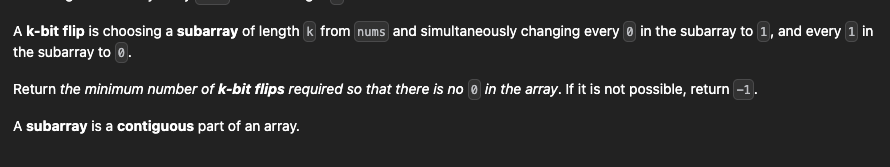

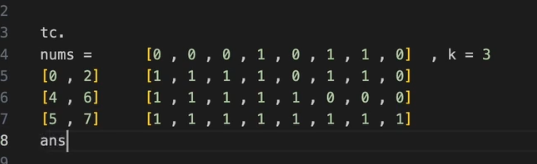

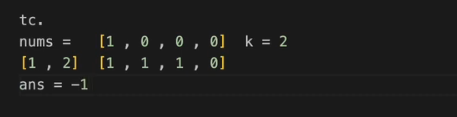

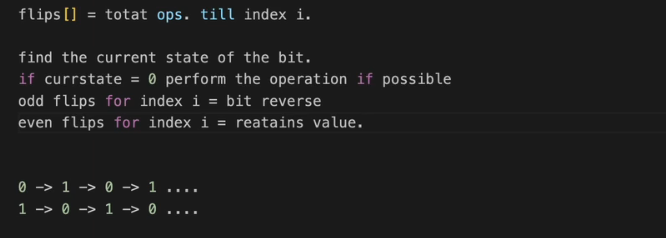

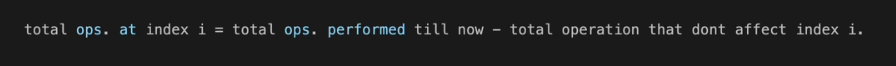

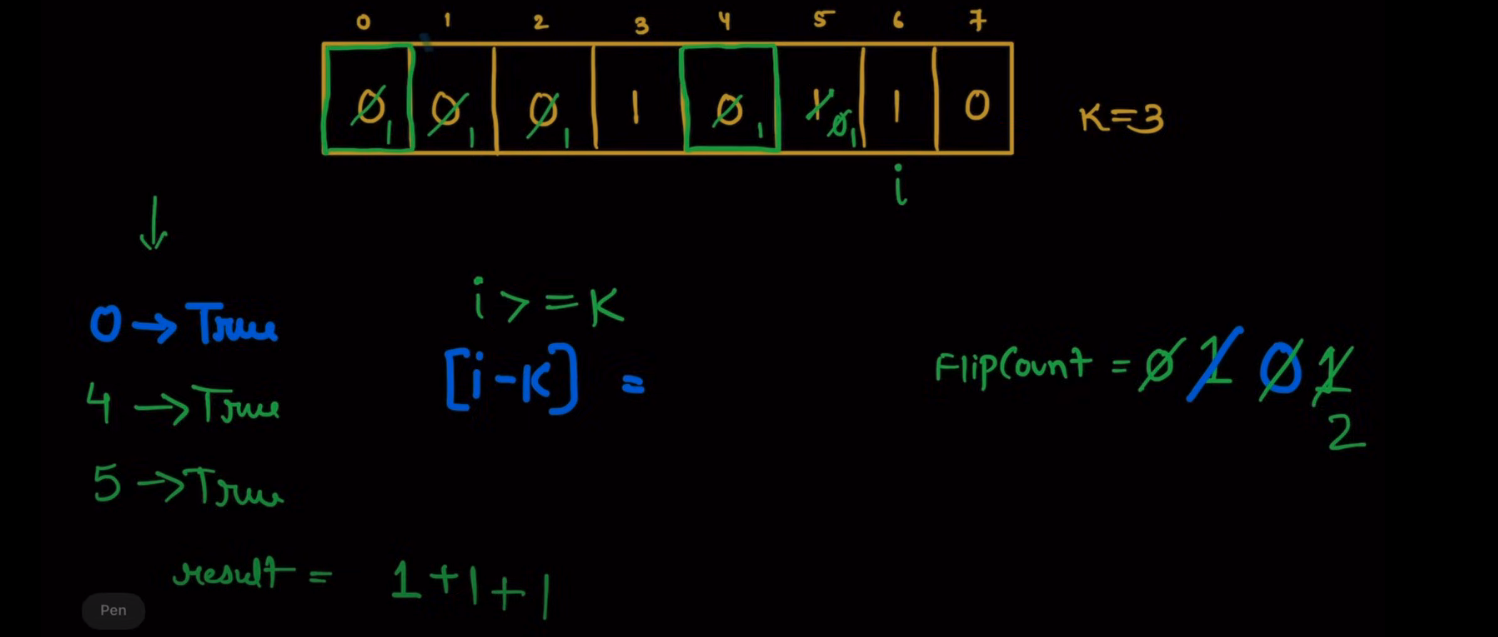

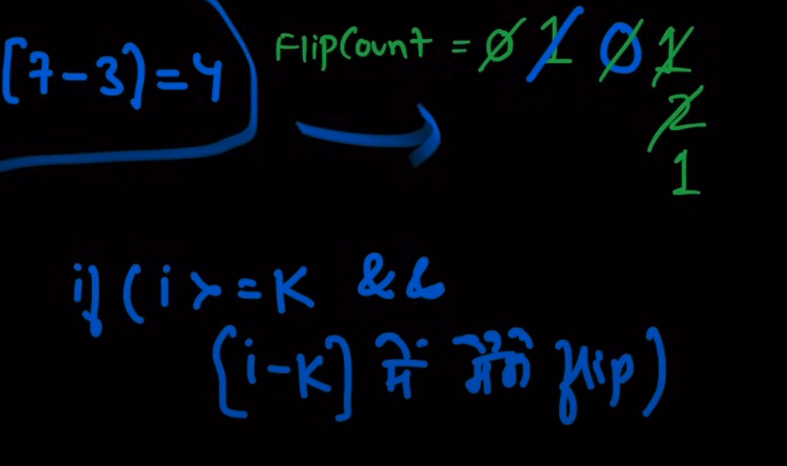

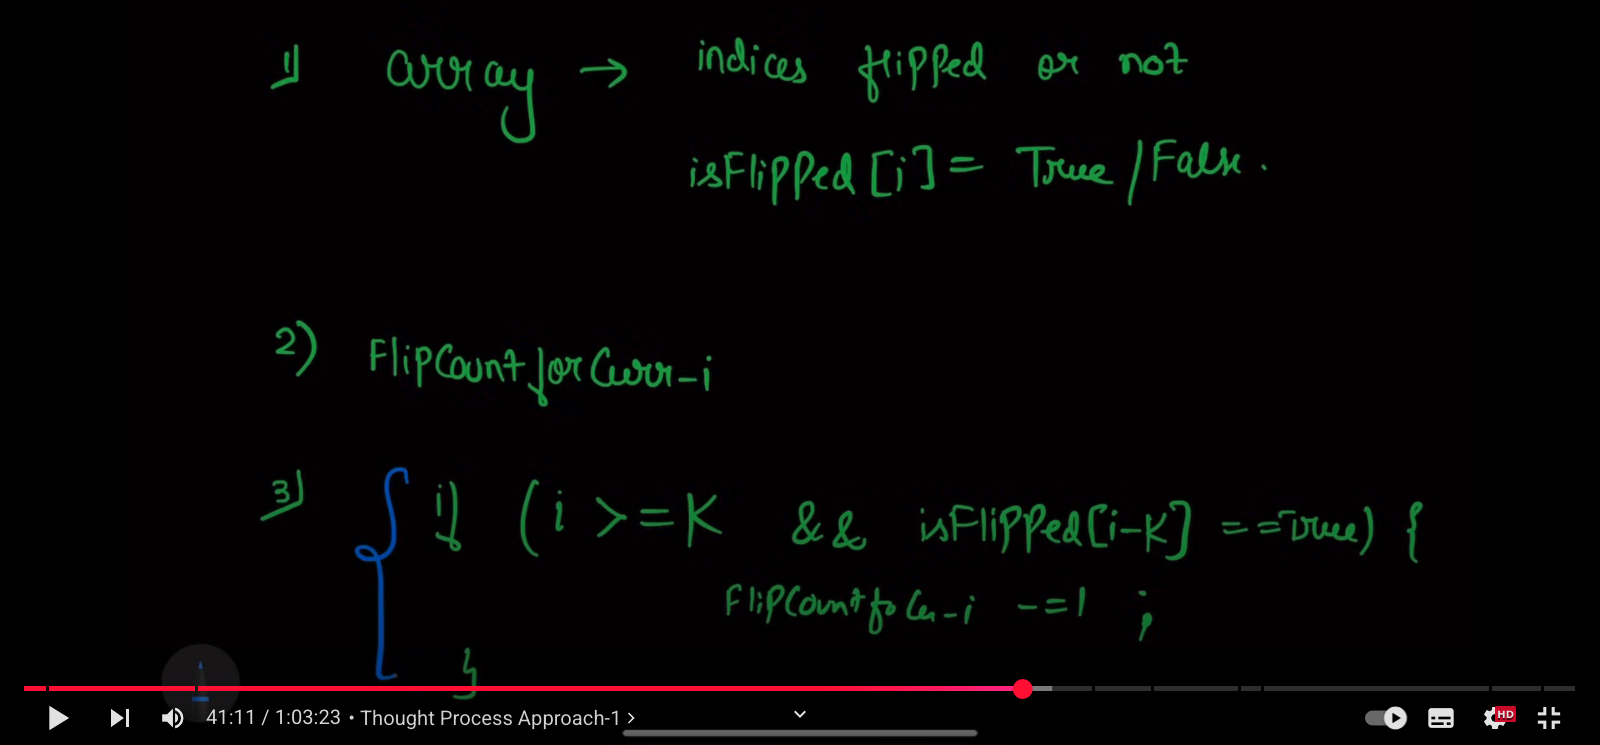

In [ ]:
class Solution {
    public:
        int minKBitFlips(vector<int>& v, int k) {
            int n=v.size();
            vector<int> isFlipped(n,0);
            int ans=0;
            int flipCntTillI=0;
    
            for(int i=0;i<n;i++){
                if(i-k>=0 and isFlipped[i-k]){
                    flipCntTillI--;
                }
                
                if(flipCntTillI%2){
                    if(v[i]==0){
                        continue;
                    }
                    else{
                        if(i+k-1>n-1){
                            return -1;
                        }
                        flipCntTillI++;
                        isFlipped[i]=1;
                        ans++;
                    }
                }
                else{
                    if(v[i]==0){
                        if(i+k-1>n-1){
                            return -1;
                        }
                        flipCntTillI++;
                        isFlipped[i]=1;
                        ans++;
                    }
                    else{
                        continue;
                    }
                }
            }
            return ans;
        }
    };

manipulating the original array

In [ ]:
class Solution {
    public:
        int minKBitFlips(vector<int>& v, int k) {
            int n=v.size();
            vector<int> isFlipped(n,0);
            int ans=0;
            int flipCntTillI=0;
    
            for(int i=0;i<n;i++){
                if(i-k>=0 and v[i-k]==-1){
                    flipCntTillI--;
                }
                
                if(flipCntTillI%2){
                    if(v[i]==0){
                        continue;
                    }
                    else{
                        if(i+k-1>n-1){
                            return -1;
                        }
                        flipCntTillI++;
                        v[i]=-1;
                        ans++;
                    }
                }
                else{
                    if(v[i]==0){
                        if(i+k-1>n-1){
                            return -1;
                        }
                        flipCntTillI++;
                        v[i]=-1;
                        ans++;
                    }
                    else{
                        continue;
                    }
                }
            }
            return ans;
        }
    };

using deque to store isFlipped, will take a maximum space of k only

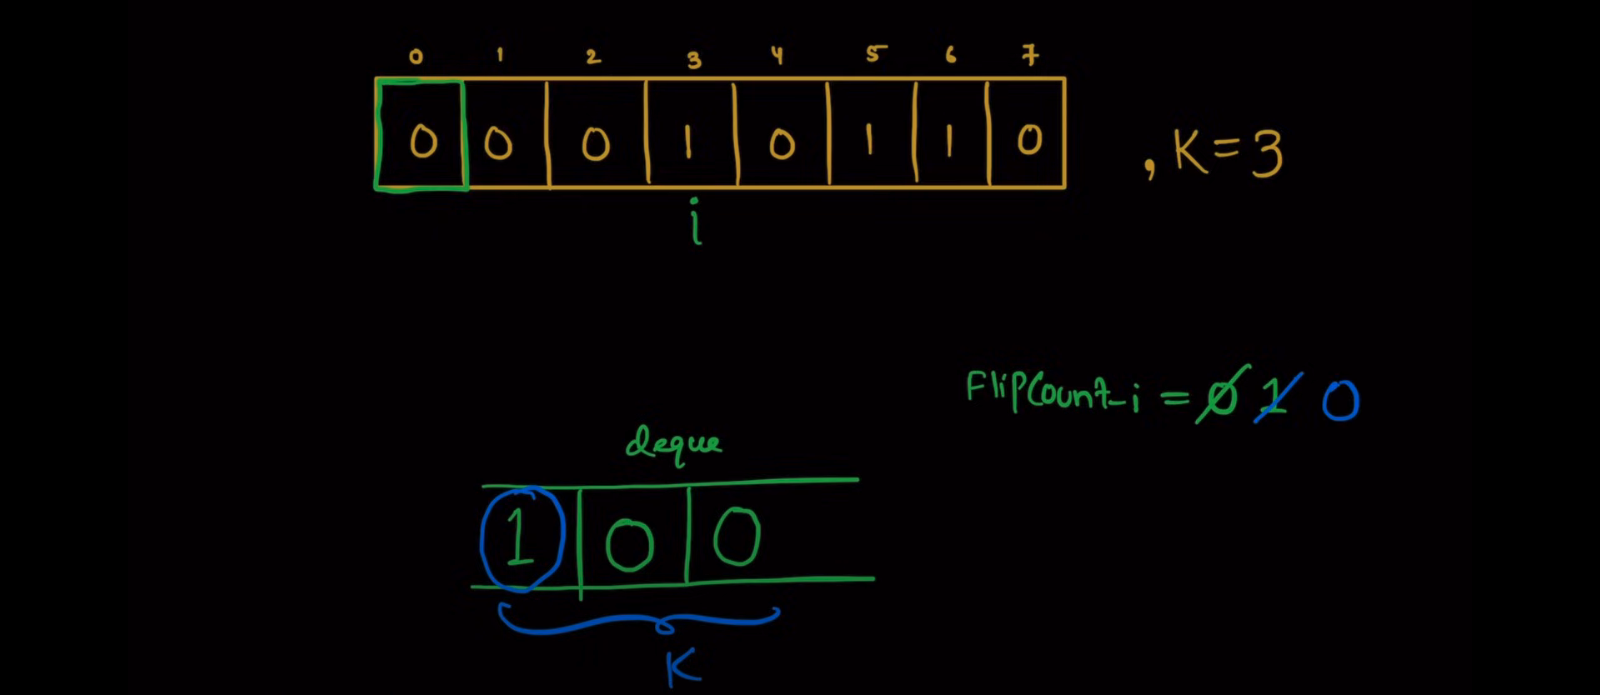

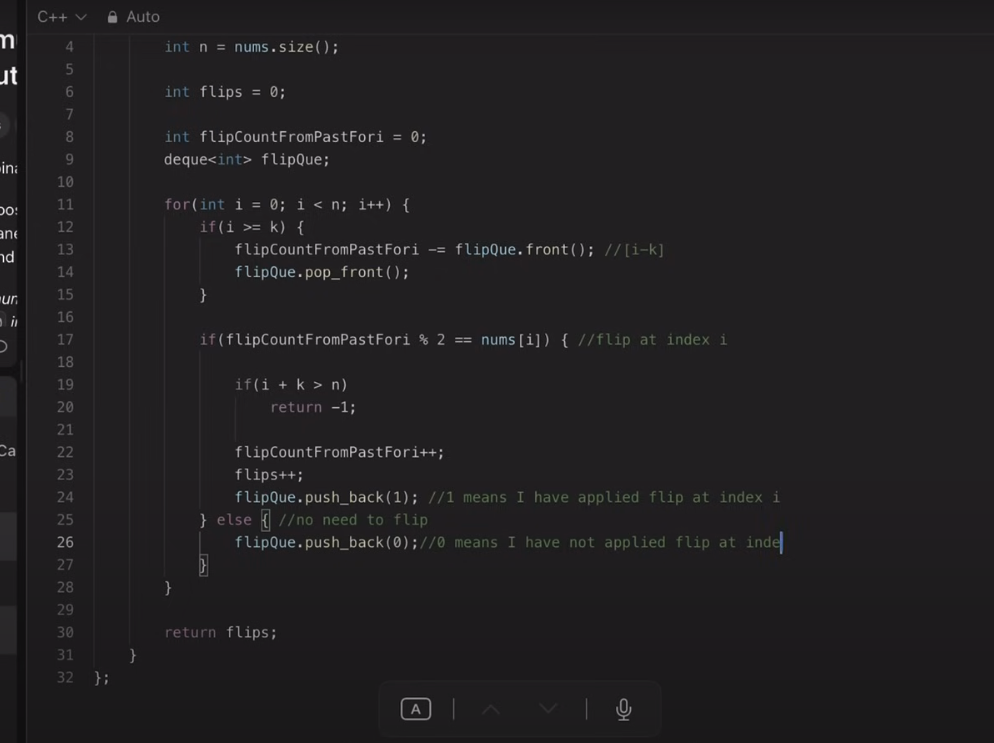